# 线性代数模型

线性代数是处理矩阵和向量空间的数学分支，在很多实际领域都有应用。本章主要结合斐波那契数列、莱斯利模型和PageRank算法，介绍特征值和特征向量的应用。最后给出奇异值分解在推荐算法和图像压缩中的应用。


## 1 特征值与特征向量

### 1.1 差分方程
斐波那契（Fibonacci）数列的通项。

斐波那契在13世纪初提出，一对兔子出生一个月后开始繁殖，每个月出生一对新生兔子，假定兔子只繁殖，没有死亡，问第 个月月初会有多少对兔子？
以对为单位，每个月繁殖兔子对数构成一个数列，这便是著名的斐波那契数列：1，1，2，3，5，8，⋯，
$$
此数列F_k满足条件F_0=1,F_1=1,F_(k+2)=F_(k+1)+F_k,k=0,1,2,⋯.\tag{1}
$$

解法一：运用特征值和特征向量求 的通项。
首先将二阶差分方程(1)化成一阶差分方程组。式(1)等价于
$$
\begin{cases}
F_{k + 1} & = & F_{k + 1} \\
F_{k + 2} & = & F_{k + 1} + F_k\\
\end{cases}
$$
写成矩阵形式为：
$$
\alpha_{k + 1} = A\alpha_k, \, k = 0, 1, 2, ...\tag{2}
$$
其中：
$$
A = \begin{bmatrix}
0 & 1\\
1 & 1\\
\end{bmatrix}, \, \alpha_k = \begin{bmatrix}
F_k\\
F_{k + 1}
\end{bmatrix}, \, \alpha_0 = \begin{bmatrix}
1\\
1\\
\end{bmatrix}
$$
我们令$P = \begin{bmatrix}
-\frac{\sqrt{5} + 1}{2} & \frac{\sqrt{5} - 1}{2}\\
1 & 1\\
\end{bmatrix}$, 于是有：
$$
A = P\begin{bmatrix}
\lambda_1 & 0\\
0 & \lambda_2\\
\end{bmatrix}P^{-1}, A^k = P\begin{bmatrix}
\lambda_1^k & 0\\
0 & \lambda_2^k\\
\end{bmatrix}P^{-1}
$$
所以有：

$$
\alpha_k = A^k \alpha_0 = A^k \begin{bmatrix} 1 \\ 1 \end{bmatrix} = \begin{bmatrix}
(1 - \sqrt{5})^k + \sqrt{5}(1 + \sqrt{5})^k + \frac{3}{\sqrt{5} + 5}(1 + \sqrt{5})^k \\
2 \cdot 5^k (1 - \sqrt{5})^{k + 1} + \frac{5 + 3\sqrt{5}}{10}(1 + \sqrt{5})^k
\end{bmatrix}
$$
所以有$F_k = 1 - \sqrt{5})^k + \sqrt{5}(1 + \sqrt{5})^k + \frac{3}{\sqrt{5} + 5}(1 + \sqrt{5})^k$

In [13]:
import sympy as sp
sp.var('k', positive=True, integer=True)
a = sp.Matrix([[0, 1], [1, 1]])
val = a.eigenvals()
vec = a.eigenvects()
P, D = a.diagonalize()
ak = P @ (D ** k) @ (P.inv())
F = ak @ sp.Matrix([1, 1])
s = sp.simplify(F[0])//化简
print(s)
sm = []
for i in range(20):
    sm.append(s.subs(k, i).n())
print(sm)

NameError: name '化简' is not defined

解法二：差分方程的特征根解法。
差分方程的特征方程为
$$
\lambda^2 - \lambda - 1 = 0
$$
特征根分别为$\frac{1 - \sqrt{5}}{2}, \frac{1 + \sqrt{5}}{2}$是互异的。则有：
$$
F_k = c_1(\frac{1 - \sqrt{5}}{2})^k + c_2(\frac{1 + \sqrt{5}}{2})^k
$$
从而有方程组：
$$
\begin{cases}
c_1 + c_2 & = & 1\\
c_1(\frac{1 - \sqrt{5}}{2}) + c_2(\frac{1 + \sqrt{5}}{2}) & = & 1\\
\end{cases}
$$
由此方程组解得$c_1=(\frac{1}{2}-\frac{\sqrt{5}}{10})，c_2=(\frac{1}{2}+\frac{\sqrt{5}}{10})$

In [4]:
import sympy as sp
sp.var('t, c1, c2')
t0 = sp.solve(t ** 2 - t - 1)
eq1 = c1 + c2 - 1
eq2 = c1 * t0[0] + c2 * t0[1] - 1
s = sp.solve([eq1, eq2])
print('c1 = ', s[c1]); print('c2 = ', s[c2])

c1 =  1/2 - sqrt(5)/10
c2 =  sqrt(5)/10 + 1/2


解法三：直接利用Python软件求解。

In [5]:
import sympy as sp
sp.var('k'); y = sp.Function('y')
f = y(k+2)-y(k+1)-y(k)
s = sp.rsolve(f, y(k),{y(0):1,y(1):1})
print(s)

(1/2 - sqrt(5)/2)**k*(1/2 - sqrt(5)/10) + (1/2 + sqrt(5)/2)**k*(sqrt(5)/10 + 1/2)


## 2 莱斯利（Leslie）种群模型
莱斯利模型是研究动物种群数量增长的重要模型，这一模型研究了种群中雌性动物的年龄分布和数量增长的规律。
在某动物种群中，仅考察雌性动物的年龄和数量。设雌性动物的最大生存年龄为$L$（单位：年或其他时间单位），把$[0, L]$等分为$n$个年龄组，每一年龄组的长度为$\frac{L}{n}$，$n$个年龄组分别为：
$$
[0, \frac{L}{n}), \,\,[\frac{L}{n}, \frac{2L}{n}), ...
$$

In [10]:
import numpy as np
import sympy as sp

X0 = np.array([500, 1000, 500])
L = np.array([[0, 4, 3], [0.5, 0, 0], [0, 0.25, 0]])
X1 = L @ X0; X2 = L @ X1  #@表示矩阵乘法
X3 = L @ X2

Ls = sp.Matrix([[0, 4, 3], [sp.Rational(1,2), 0, 0],
                [0, sp.Rational(1,4), 0]])  #符号矩阵, sp.Rational(1,2) 表示 1/2
sp.var('lamda')  #定义符号变量
p = Ls.charpoly(lamda)  #计算特征多项式
w1 = sp.roots(p)     #计算特征值
w2 = Ls.eigenvals()  #直接计算特征值
v = Ls.eigenvects()  #直接计算特征向量
print("特征值为：",w2)
print("特征向量为：\n",v)
P, D = Ls.diagonalize()  #相似对角化
Pinv = P.inv()  #求逆阵
Pinv = sp.simplify(Pinv)
cc = Pinv @ X0
print('P=\n', P)
print('c=', cc[0])

特征值为： {3/2: 1, -3/4 - sqrt(5)/4: 1, -3/4 + sqrt(5)/4: 1}
特征向量为：
 [(3/2, 1, [Matrix([
[18],
[ 6],
[ 1]])]), (-3/4 - sqrt(5)/4, 1, [Matrix([
[3*sqrt(5) + 7],
[ -3 - sqrt(5)],
[            1]])]), (-3/4 + sqrt(5)/4, 1, [Matrix([
[7 - 3*sqrt(5)],
[ -3 + sqrt(5)],
[            1]])])]
P=
 Matrix([[18, 3*sqrt(5) + 7, 7 - 3*sqrt(5)], [6, -3 - sqrt(5), -3 + sqrt(5)], [1, 1, 1]])
c= 2250/19


## 3 PageRank算法
Google拥有多项专利技术, 其中PageRank算法是关键技术之一, 它奠定了Google强大的检索功能及提供各种特色功能的基础. 虽然Google每天有很多工程师负责全面改进Google系统, 但是仍把PageRank 算法作为所有网络搜索工具的基础结构。

### 3.1 PageRank原理
PageRank算法利用了互联网独特的超链接结构。在庞大的超链接资源中，Google提取出上亿个超链接页面进行分析，制作出一个巨大的网络地图。具体地讲，就是把所有的网页看作图里面相应的顶点，如果网页A有一个指向网页B 的链接，则认为存在一条从顶点A 到顶点B 的有向边。这样就可以利用图论来研究网络的拓扑结构。

PageRank算法正是利用网络的拓扑结构来判断网页的重要性。具体来说，假如网页A有一个指向网页B的超链接，Google 就认为网页A 投了网页B一票，说明网页A 认为网页B有链接价值，因而B可能是一个重要的网页。Google根据指向网页B的超链接数及其重要性来判断页面B的重要性，并赋予相应的页面等级值（PageRank）。

网页A 的页面等级值被平均分配给网页A 所链接指向的网页，从而当网页A 的页面等级值比较高时, 则网页B可从网页A 到它的超链接分得一定的重要性。根据这样的分析，得到了高评价的重要页面会被赋予较高的网页等级，在检索结果内的排名也会较高。页面等级值(PageRank)是 Google表示网页重要性的综合性指标，当然，重要性高的页面如果和检索关键词无关同样也没有任何意义。为此，Google使用了完善的超文本匹配分析技术，使得能够检索出重要而且正确的网页。

### 3.2 基础的PageRank算法
PageRank算法的具体实现可以利用网页所对应图的邻接矩阵来表达超链接关系。为此，首先写出所对应图的邻接矩阵$W$。为了能将网页的页面等级值平均分配给该网页所链接指向的网页，对$W$各个行向量进行归一化处理，得矩阵$P$。矩阵$P$被称为状态转移概率矩阵，它的各个行向量元素之和为1，$P^T$的最大特征值（一定为1）所对应的归一化特征向量即为各顶点的PageRank值。

PageRank值的计算步骤如下：

1. 构造有向图$D = (V, A, W)$，其中$V = \{v_1, v_2, ..., v_N\}$为顶点集合，每一个网页是图的一个顶点，$A$为弧的集合，网页间的每一个超链接是图的一条弧，邻接矩阵$W = (w_{ij})_{N*N}$，如果从网页{i}到网页{j}有超链接，则$w_{ij} = 1$，否则为0。
2. 记矩阵$W$的行和为$r_i = \sum_{j = 1}^{N}w{ij}$，它给出了页面 的链出链接数目。定义矩阵$P$如下:
$$
p_{ij} = \frac{w_{ij}}{r_i}, \, i, j = 1, 2, ..., N,
$$
是Markov链的状态转移概率矩阵，$p_{ij}$表示从页面i转移到页面j的概率。
3. 求Markov链的平稳分布$x = [x_1, x_2, ..., x_N]^T$，它满足
$$
P^Tx = x, \, \sum_{i = 1}^{N}x_i = 1.
$$
$x$表示在极限状态（转移次数趋于无限）下各网页被访问的概率分布，Google将它定义为各网页的PageRank值。假设$x$已经得到，则它按分量满足方程
$$
x_k = \sum_{i = 1}^{N}p_{ik}{x_i} = \sum_{i = 1}^{N}\frac{w_{ik}}{r_i}x_i.
$$
网页$i$的PageRank值是$x_i$，它链出的页面有$r_i$个，于是页面i将它的PageRank值分成$r_i$份，分别“投票”给它链出的网页。$x_k$为网页$k$的PageRank值，即网络上所有页面“投票”给网页$k$的最终值。

根据Markov链的基本性质还可以得到，平稳分布（即PageRank值）是状态转移概率矩阵$P$的转置矩阵$P^T$的最大特征值$(=1)$所对应的归一化特征向量。

V= [0.2727 0.2727 0.1364 0.1818 0.0455 0.0909]


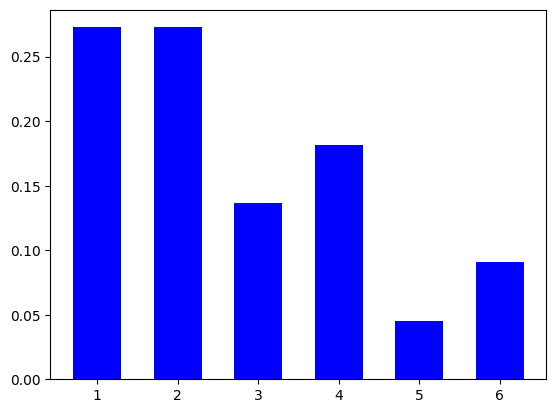

In [11]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt
L = [(1,2),(2,3),(2,4),(3,4),(3,5),
   (3,6),(4,1),(5,6),(6,1)]
w = np.zeros((6,6))  #邻接矩阵初始化
for i in range(len(L)):
    w[L[i][0]-1,L[i][1]-1] = 1
r = np.sum(w,axis=1,keepdims=True)
P = w / r          #这里利用矩阵广播
val, vec= eigs(P.T,1); V=vec.real
V=V.flatten(); #展开成（n,)形式的数组
V=V/V.sum(); print("V=",np.round(V,4))
plt.bar(range(1,len(w)+1), V, width=0.6, color='b')
plt.show()

### 3.3 随即冲浪模型的PageRank值
PageRank 算法原理中有一个重要的假设：所有的网页形成一个闭合的链接图，除了这些文档以外没有其他任何链接的出入，并且每个网页能从其他网页通过超链接达到。但是在现实的网络中, 并不完全是这样的情况。当一个页面没有链出链接的时候, 它的PageRank 值就不能被分配给其它的页面。同样道理，只有出链接而没有入链接的页面也是存在的。

同时，有时候也有链接只在一个集合内部旋转而不向外界链接的现象。在现实中的页面，无论怎样顺着链接前进，仅仅顺着链接是绝对不能进入的页面群总归是存在的。PageRank技术为了解决这样的问题，提出用户的随机冲浪模型，用户虽然在大多数场合都顺着当前页面中的链接前进, 但有时会突然重新打开浏览器随机进入到完全无关的页面。Google 认为用户在85%的情况下沿着链接前进，但在15%的情况下会跳跃到无关的页面中。

用公式表示相应的转移概率矩阵为
$$
\vec{P} = \frac{1 - d}{N}ee^T + dP,
$$
其中，$e$为分量全为1的N维列向量，从而$ee^T$为全1矩阵，$d\in(0, 1)$为阻尼因子，

V= [0.2675 0.2524 0.1323 0.1697 0.0625 0.1156]


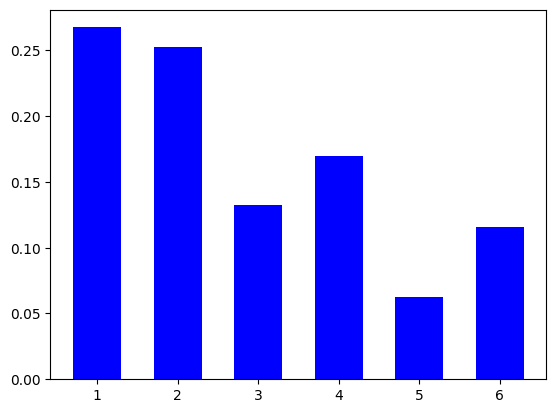

In [5]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt
L=[(1,2),(2,3),(2,4),(3,4),(3,5),
   (3,6),(4,1),(5,6),(6,1)]
w = np.zeros((6,6))
for i in range(len(L)):
    w[L[i][0]-1,L[i][1]-1]=1
r=np.sum(w,axis=1,keepdims=True)
P = (1-0.85)/w.shape[0]+0.85*w/r   #这里利用矩阵广播
val, vec = eigs(P.T, 1); V = vec.real
V=V.flatten(); #展开成（n,)形式的数组
V=V/V.sum(); print("V=", np.round(V,4))
plt.bar(range(1,len(w)+1),V, width=0.6, color='b')
plt.show()

## 4 矩阵的奇异值分解及应用

### 4.1 矩阵的奇异值分解
矩阵的奇异值分解变换是一种正交变换，它可以将矩阵对角化。我们知道任何一个矩阵都有它的奇异值分解，对于奇异值分解可用下面的定理来描述：

设$A$是一个秩为$r的n * m矩阵$，则存在着正交矩阵$U和V$，使得
$$
U^TAV = \begin{bmatrix}
\Sigma & 0\\
0 & 0\\
\end{bmatrix}
$$
其中$\Sigma = diag\{\sigma_1, ..., \sigma_r\}$，这里$\sigma_1\geq\sigma_2\geq...\geq\sigma_r\geq0$,$\sigma_1^2,...\sigma_r^2$是矩阵$A^TA$对应的正特征值。称
$$
A = U\begin{bmatrix} \Sigma & 0\\ 0 & 0\\ \end{bmatrix} V^T
$$
为$A$的奇异值分解，$\sigma_i$为$A$的奇异值

#### 4.1.1 例题一
求解矩阵
$$
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 1\\
0 & 0 & 0\\
\end{bmatrix}
$$
的奇异值分解

In [6]:
import numpy as np
from numpy.linalg import svd
a = np.array([[1, 0, 1], [0, 1, 1], [0, 0, 0]])
u,s,vt = svd(a)  #a=u@np.diag(s)@vt
print(u); print(s); print(vt)

[[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
[1.73205081 1.         0.        ]
[[ 4.08248290e-01  4.08248290e-01  8.16496581e-01]
 [-7.07106781e-01  7.07106781e-01  2.22044605e-16]
 [-5.77350269e-01 -5.77350269e-01  5.77350269e-01]]


### 4.2 奇异值应用

In [10]:
import numpy as np
import pandas as pd

a = np.loadtxt('data3_6_1.txt')
b = 0.5 * np.corrcoef(a.T) + 0.5  #求归一化的相似度
c= pd.DataFrame(b)
c.to_excel('data3_6_2.xlsx', index=False)

print('请输入人员编号1-18')
user = int(input())
n = a.shape[1]  #变量的个数
no = np.where(a[user-1, :]==0)[0] #未评分编号
yb = set(range(n)) - set(no)  #已评分编号
yb = list(yb)
ys = a[user-1, yb]  #已评分分数
sc = np.zeros(len(no))  #初始化
for i in range(len(no)):
    sim = b[no[i], yb]
    sc[i] = ys @ sim / sum(sim)
print('未评分项的编号为：', no+1)
print('未评分项的分数为：', np.round(sc, 4))

[[1.         0.4892838  0.46797481 0.79197625 0.40431024 0.32579546
  0.40039121 0.85648051 0.4623417  0.33684806 0.39109542]
 [0.4892838  1.         0.50288464 0.43555759 0.81044228 0.44400516
  0.51844278 0.42137864 0.36092663 0.25710988 0.59678678]
 [0.46797481 0.50288464 1.         0.58848504 0.46763127 0.41335471
  0.87091538 0.43367533 0.66876796 0.33057015 0.42377984]
 [0.79197625 0.43555759 0.58848504 1.         0.3370449  0.31388033
  0.54991687 0.89406499 0.44981155 0.31672434 0.39521549]
 [0.40431024 0.81044228 0.46763127 0.3370449  1.         0.71332223
  0.43441794 0.30809377 0.40886499 0.27578405 0.78107331]
 [0.32579546 0.44400516 0.41335471 0.31388033 0.71332223 1.
  0.35390006 0.30392626 0.37796088 0.55010745 0.78752196]
 [0.40039121 0.51844278 0.87091538 0.54991687 0.43441794 0.35390006
  1.         0.4413557  0.80478511 0.43158477 0.36880124]
 [0.85648051 0.42137864 0.43367533 0.89406499 0.30809377 0.30392626
  0.4413557  1.         0.41703093 0.31636639 0.37571136]


        numpy.corrcoef(x, y=None, rowvar=True, bias=<no value>, ddof=<no value>)
参数说明
x:

输入数据，可以是一维或二维数组。

如果是一维数组，表示单个变量的观测值。

如果是二维数组，每一行或每一列表示一个变量的观测值（取决于 rowvar 参数）。

y (可选):

另一个变量或数据集，用于计算 x 和 y 之间的相关系数。

如果提供，y 必须与 x 的形状兼容。

rowvar (可选，默认为 True):

如果为 True，则每一行表示一个变量，每一列表示一个观测值。

如果为 False，则每一列表示一个变量，每一行表示一个观测值。

bias 和 ddof (可选):

用于控制计算协方差时的自由度调整。

一般情况下不需要设置，默认值即可。

### 5.3 基于奇异值分解压缩数据的模型二
1. 稀疏矩阵的降维处理

在原始数据矩阵中，记录了18位顾客对11道菜品的全部打分情况，因为每个人不可能吃遍美食平台上的每一道菜品（确切地说，一般人都只吃过平台上的少部分菜品），因此这个矩阵一定是一个稀疏矩阵，拥有大量的0元素项。这样，虽然一方面从表面现象看矩阵的维数很高；但是从另一方面来看，某个顾客同时对两道菜品打过分的情况却并不一定很普遍。

我们可以基于奇异值分解对原始数据进行行压缩。对 进行奇异值分解，得
$$
A = U_{18 * 18}\begin{bmatrix}
\Sigma\\
0\\
\end{bmatrix}V_{11 * 11}^T
$$
其中，$\Sigma = diag(\sigma_1, \sigma_2, ..., \sigma_11)$，这里$\sigma_1, \sigma_2, ..., \sigma_11$为矩阵A的正奇异值。

可以验证
$$
\frac{\sum_{i = 1}^6\sigma_i^2}{\sum_{i = 1}{11}\sigma_i^2} \geq 0.9,
$$
因此我们只需要6个奇异值，就可以使其达到主成分贡献率的$90\%$

于是，我们就可以通过行压缩的方式，将原始分数矩阵的行由18维压缩到6维，避免稀疏矩阵的情况。压缩以后的数据矩阵
$$
B_{6 * 11} = diag(\sigma_1, \sigma_2,...\sigma_6)U^T[: 6, :]A,
$$
其中$U^T[: 6, :]$表示$U^T$的前6行所组成的6行18列矩阵

2. 衡量菜品之间的相似性

两个菜品，我们通过不同用户对其的打分，将其量化成一个分数向量，然后通过对两个菜品的分数向量进行分析比较，定量地进行两个菜品的相似度计算。计算相似度的方法有很多，如欧氏距离、皮尔逊相关系数、余弦相似度等。
这里采用余弦相似度的方法，来定量分析两个菜品的相似程度，当然也可以换用其他的方法。


In [19]:
import numpy as np
import pandas as pd

a = np.loadtxt('data3_6_1.txt')
u, sigma, vt = np.linalg.svd(a)
print(sigma)
cs = np.cumsum(sigma**2)
rate = cs / cs[-1]  #计算信息累积贡献率
ind = np.where(rate>=0.9)[0][0]+1
#ind为奇异值的个数，满足信息提出率达到90%
b = np.diag(sigma[:ind]) @ u.T[:ind, :] @ a  #得到降维数据

c = np.linalg.norm(b, axis=0, keepdims=True)  #逐列求范数
d = 0.5 * b.T @ b / (c.T @ c) + 0.5  #求相似度
#d = 0.5 * np.corrcoef(b.T) + 0.5
dd = pd.DataFrame(d)
dd.to_excel('data3_6_3.xlsx', index=False)

print('请输入人员编号1-18')
user = int(input())
n = a.shape[1]  #变量的个数
no = np.where(a[user-1, :]==0)[0] #未评分编号
yb = set(range(n)) - set(no)  #已评分编号
yb = list(yb)
ys = a[user-1, yb]  #已评分分数
sc = np.zeros(len(no))  #初始化
for i in range(len(no)):
    sim = d[no[i], yb]
    sc[i] = ys @ sim / sum(sim)
print('未评分项的编号为：', no+1)
print('未评分项的分数为：', np.round(sc,4))

[18.00984878 13.34523472 11.52884033 10.1161419   7.13556169  5.86405759
  4.87893356  3.59711712  3.28710923  2.48996847  2.06103963]
cs: [324.35465316 502.44994301 635.36410242 737.70042928 788.61666997
 823.00384134 846.80783398 859.74708558 870.55217267 876.75211566
 881.        ]
请输入人员编号1-18
未评分项的编号为： [ 2  5  6  8 10]
未评分项的分数为： [2.5093 2.4824 2.4681 2.4735 2.5831]


### 5.4 利用SVD进行图形压缩
奇异值分解在图像处理中有着重要应用。假定一幅图像有 个像素，如果将这 个数据一起传送，往往会显得数据量太大。因此，我们希望能够改为传送另外一些比较少的数据，并且能够在接收端利用这些传送的数据重构原图像。

Rank=256:K=1个：ratio=99.22
Rank=256:K=11个：ratio=91.39
Rank=256:K=21个：ratio=83.56
Rank=256:K=31个：ratio=75.73
Rank=256:K=41个：ratio=67.91
Rank=256:K=51个：ratio=60.08
Rank=256:K=61个：ratio=52.25


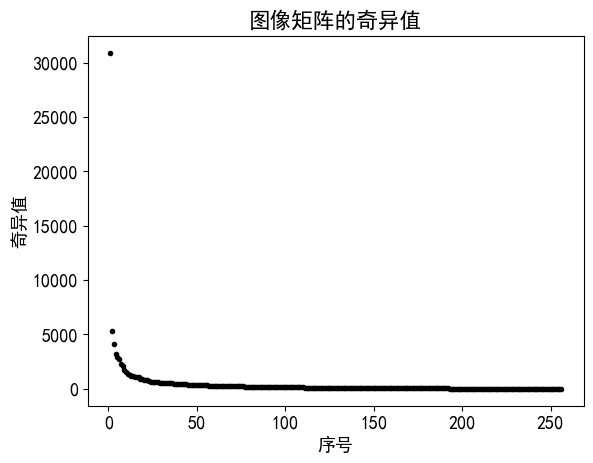

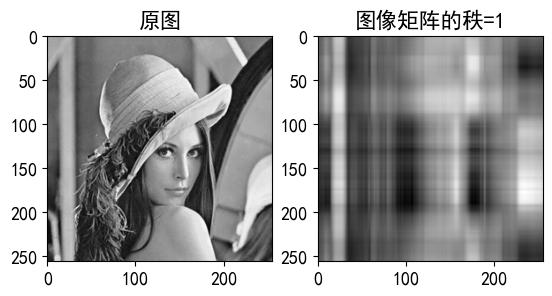

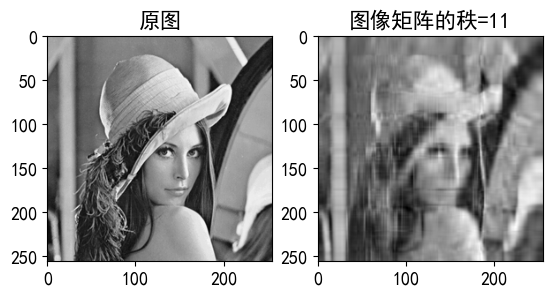

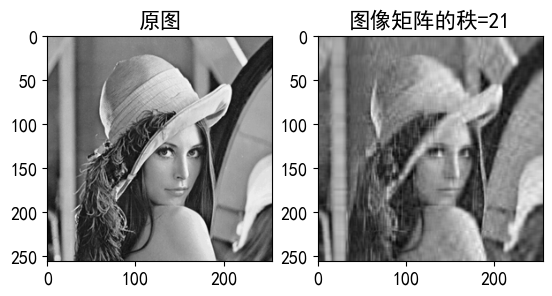

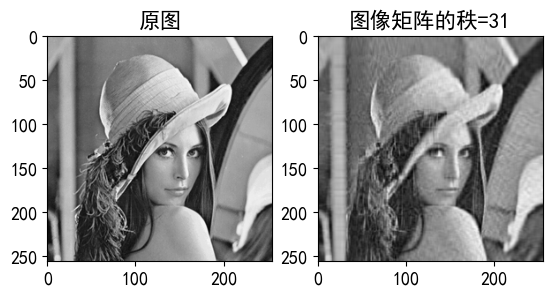

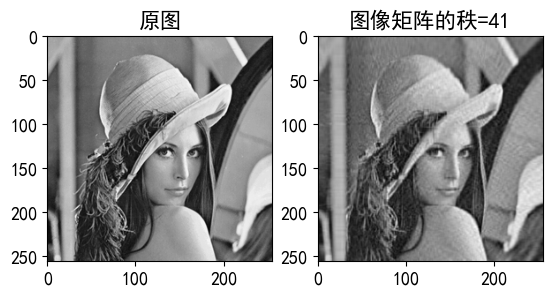

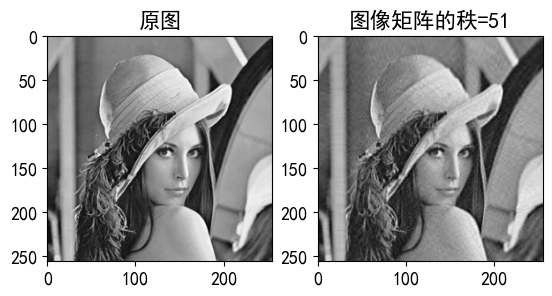

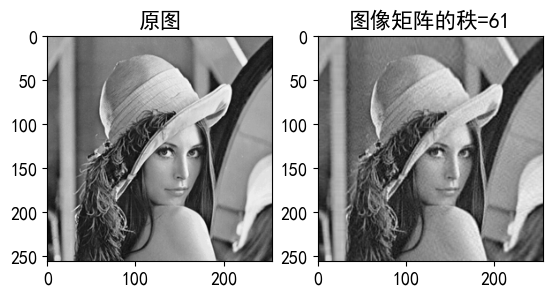

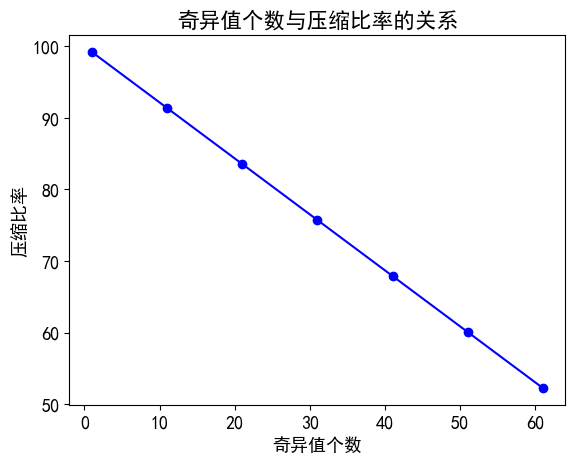

In [20]:
import numpy as np
from numpy import linalg as LA
from PIL import Image
import pylab as plt  #加载Matplotlib的Pylab接口
plt.rc('font', size=13)
plt.rc('font', family='SimHei')
a = Image.open("Lena.bmp")  #返回一个PIL图像对象
if a.mode != 'L':
    a = a.convert("L")  #转换为灰度图像
b = np.array(a).astype(float)  #把图像对象转换为数组
[p, d, q] = LA.svd(b)
m,n=b.shape
R = LA.matrix_rank(b)  #图像矩阵的秩
plt.figure(0)
plt.plot(np.arange(1,len(d)+1),d,'k.')
plt.ylabel('奇异值'); plt.xlabel('序号')
plt.title('图像矩阵的奇异值')
CR=[]
for K in range(1,int(R/4),10):
    plt.figure(K)
    plt.subplot(121)
    plt.title('原图')
    plt.imshow(b, cmap='gray')
    I = p[:,:K+1] @ (np.diag(d[:K+1])) @ (q[:K+1,:])
    plt.subplot(122)
    plt.title('图像矩阵的秩='+str(K))
    plt.imshow(I, cmap='gray')
    src=m*n; compress=K*(m+n+1)
    ratio=(1-compress/src)*100  #计算压缩比率
    CR.append(ratio)
    print("Rank=%d:K=%d个：ratio=%5.2f"%(R,K,ratio))
plt.figure(); plt.plot(range(1,int(R/4),10),CR,'ob-');
plt.title("奇异值个数与压缩比率的关系"); plt.xlabel("奇异值个数")
plt.ylabel("压缩比率"); plt.show()
